<a href="https://colab.research.google.com/github/tiknaa/Operating-System-Lab/blob/main/Flat_Price_Estimation_for_UrbanNest_Realtors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 Flat Price Estimation for UrbanNest Realtors
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#load/read dataset
df=pd.read_csv("/content/Flat Price Estimation for UrbanNest Realtors.csv")

In [ ]:
df.head()

,area_sqft,bedrooms,distance_to_metro_km,age_of_flat_years,amenities_score,flat_price
0,693.0,4,2.49,17,7.0,2077761.0
1,755.0,3,2.04,11,1.3,2185745.0
2,1646.0,4,1.46,22,1.0,4343281.0
3,1036.0,4,0.10,6,7.7,3037490.0
4,1064.0,2,1.50,24,6.3,3019102.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_sqft             1000 non-null   float64
 1   bedrooms              1000 non-null   int64  
 2   distance_to_metro_km  1000 non-null   float64
 3   age_of_flat_years     1000 non-null   int64  
 4   amenities_score       1000 non-null   float64
 5   flat_price            1000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [ ]:
df=df.dropna()

In [ ]:
df.describe(include='all')

,area_sqft,bedrooms,distance_to_metro_km,age_of_flat_years,amenities_score,flat_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,995.077000,2.507000,2.061090,14.665000,5.093700,2.808757e+06
std,287.435193,1.114088,1.994558,8.701407,2.845176,7.217363e+05
min,300.000000,1.000000,0.100000,0.000000,0.000000,8.390090e+05
25%,808.750000,2.000000,0.640000,7.000000,2.700000,2.336889e+06
50%,996.000000,2.000000,1.510000,14.500000,5.200000,2.801986e+06
75%,1188.500000,4.000000,2.895000,22.000000,7.600000,3.301842e+06
max,1923.000000,4.000000,15.000000,29.000000,10.000000,5.082323e+06


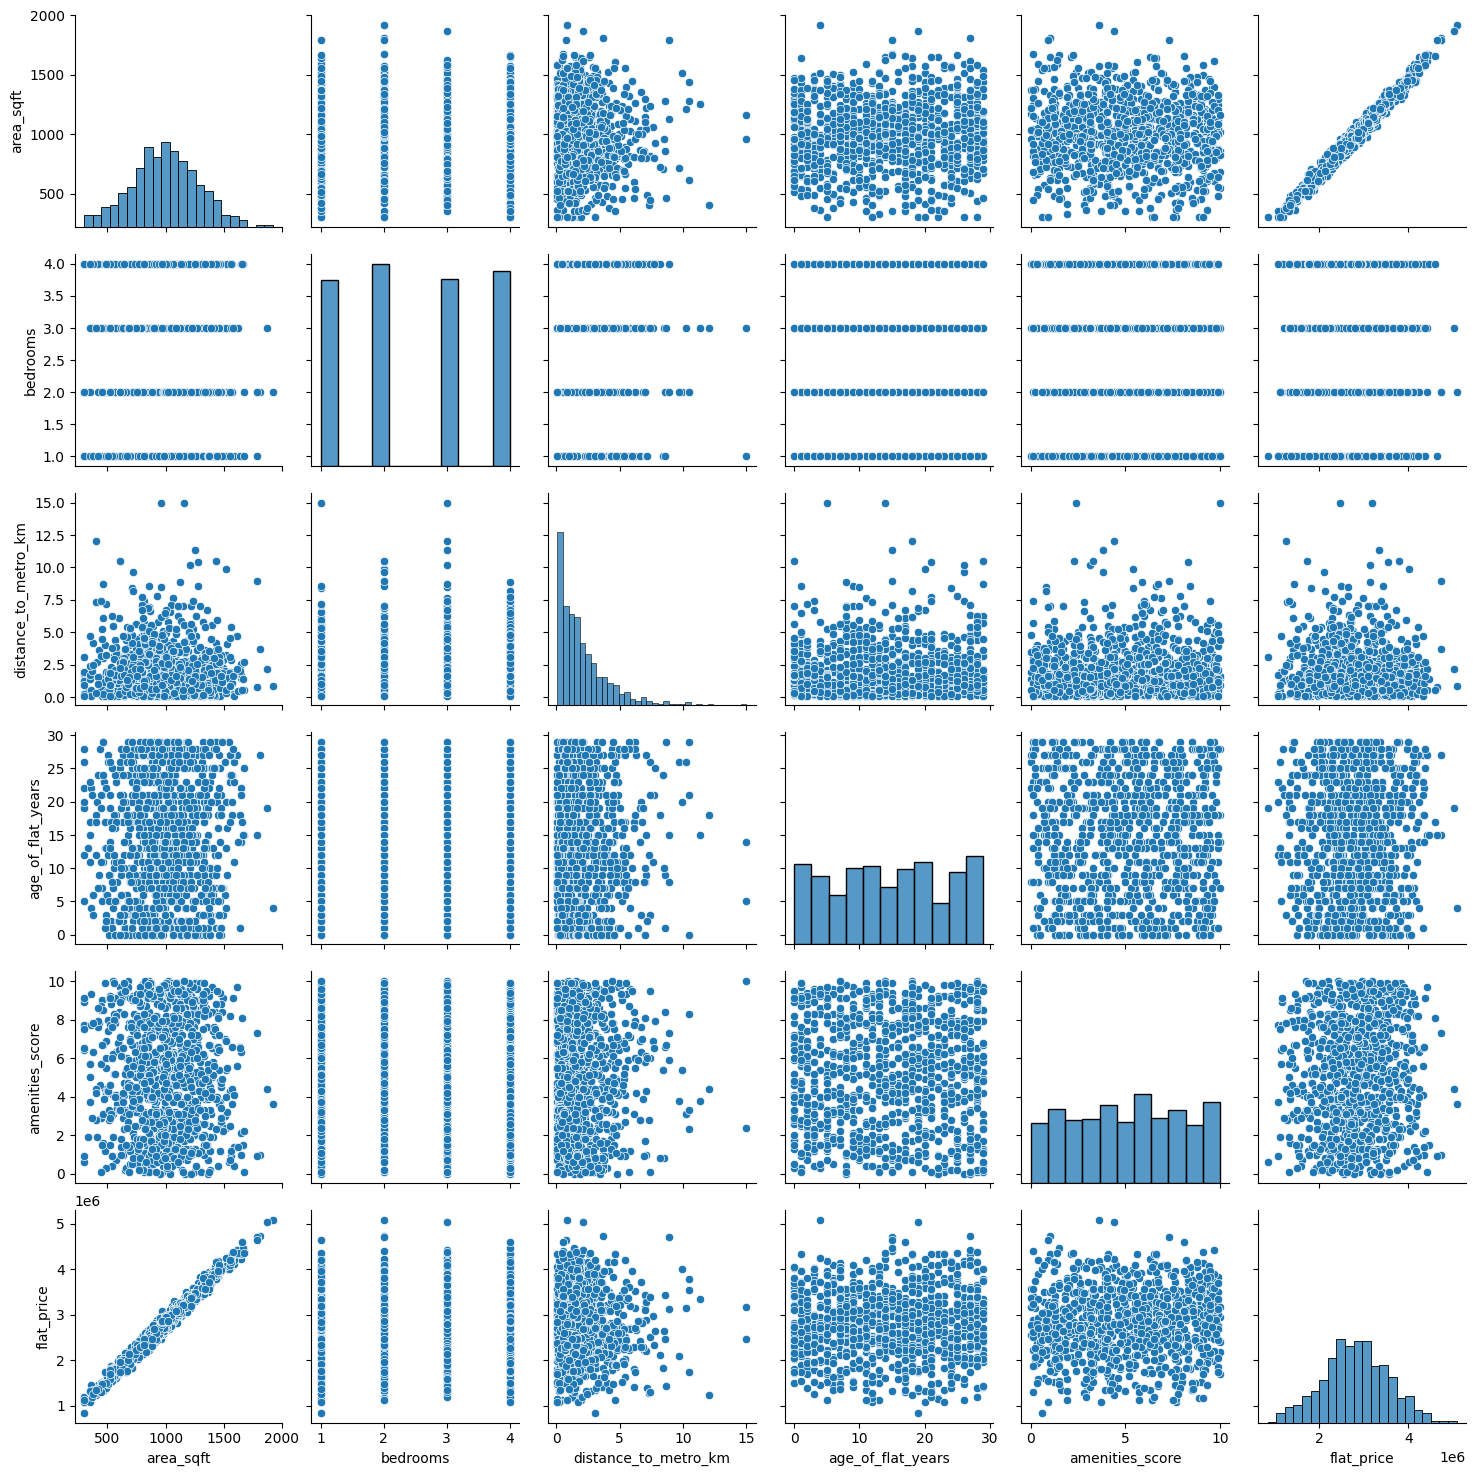

In [ ]:
#Exploratory Data Analysis
sns.pairplot(df)
plt.show()

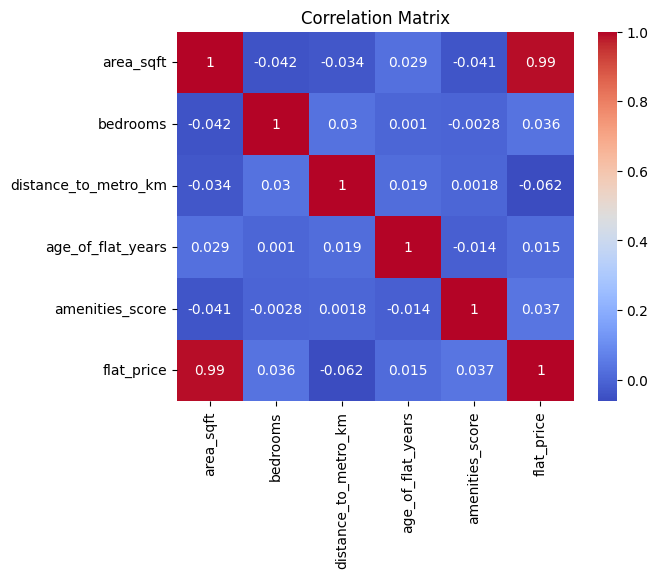

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#define x and y
X = df.drop('flat_price', axis=1)
y = df['flat_price']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n🔍 {name} Evaluation")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²   :", r2_score(y_true, y_pred))

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")


🔍 Linear Regression Evaluation
MAE : 37994.842417061765
RMSE: 47520.693711970576
R²   : 0.9954425154048717

🔍 Random Forest Evaluation
MAE : 53243.40539999999
RMSE: 65317.04199765343
R²   : 0.9913898110337281


In [ ]:
import joblib
joblib.dump(rf_model, 'flat_price_predictor.pkl')

['flat_price_predictor.pkl']